# **HEART FAILURE PREDICTION**

Dataset Link- https://www.kaggle.com/jackleenrasmybareh/heart-failure

The data are simulated based on real hospital administrative data for England called Hospital Episodes Statistics. Every public (National Health Service, NHS) hospital in the country must submit records for every admission; private hospitals also submit records for any NHS patients that they treat.

In [ ]:
#some libraries that are needed to be installed
!pip install catboost

Importing libraries

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import missingno as m
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
import tensorflow.keras
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from sklearn.ensemble import AdaBoostClassifier
from catboost import CatBoostClassifier
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, r2_score, accuracy_score, plot_confusion_matrix, log_loss

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Tasks/task(ICA)/Heart Failure.csv')

In [ ]:
data.head()

,id,death,los,age,gender,cancer,cabg,crt,defib,dementia,diabetes,hypertension,ihd,mental_health,arrhythmias,copd,obesity,pvd,renal_disease,valvular_disease,metastatic_cancer,pacemaker,pneumonia,prior_appts_attended,prior_dnas,pci,stroke,senile,quintile,ethnicgroup,fu_time
0,1,0,2,90,2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,4,0,0,0,0,2.0,NaN,416
1,2,0,10,74,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,1,0,0,1,9,1,0,0,0,4.0,1.0,648
2,3,0,3,83,2,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,3.0,1.0,466
3,4,0,1,79,1,0,0,0,0,0,1,1,1,0,0,1,0,0,0,0,0,1,0,9,2,1,1,0,5.0,1.0,441
4,5,0,17,94,2,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,2.0,1.0,371


In [ ]:
data.shape

(1000, 31)

The heart-failure dataset contains total 1000 sampes described by 30 features, many of which are categorical features along with categorical label

In [ ]:
columns = data.columns
columns

Index(['id', 'death', 'los', 'age', 'gender', 'cancer', 'cabg', 'crt', 'defib',
       'dementia', 'diabetes', 'hypertension', 'ihd', 'mental_health',
       'arrhythmias', 'copd', 'obesity', 'pvd', 'renal_disease',
       'valvular_disease', 'metastatic_cancer', 'pacemaker', 'pneumonia',
       'prior_appts_attended', 'prior_dnas', 'pci', 'stroke', 'senile',
       'quintile', 'ethnicgroup', 'fu_time'],
      dtype='object')

## Columns are described as:



1. death (0/1); 0: no death, 1: death
2. los (hospital length of stay in nights)
3. age (in years)
4. gender (1=male, 2=female)
5. cancer
6. cabg (previous heart bypass)
7. crt (cardiac resynchronisation device - a treatment for heart failure)
8. defib (defibrillator implanted)
9. dementia
10. diabetes (any type)
11. hypertension
12. ihd (ischaemic heart disease)
13. mental_health (any mental illness)
14. arrhythmias
15. copd (chronic obstructive lung disease)
16. obesity
17. pvd (peripheral vascular disease)
18. renal_disease
19. valvular_disease (disease of the heart valves)
20. metastatic_cancer
21. pacemaker
22. pneumonia
23. priorapptsattended (number of outpatient appointments attended in the previous year)
24. prior_dnas (number of outpatient appointments missed in the previous year)
25. pci (percutaneous coronary intervention)
26. stroke (history of stroke)
27.senile
28. quintile (socio-economic status for patient's neighbourhood, from 1 (most affluent) to 5 (poorest))
29. ethnicgroup (see below for categories)
30. fu_time (follow-up time, i.e. time in days since admission to hospital)

Ethnic group has the following categories in this extract:

1=white, 2=black, 3=Indian subcontinent, 8=not known, 9=other



In [ ]:
# id is the unique value column which has no effect on data
# Remove id column
data.drop('id', axis=1, inplace=True)

In [ ]:
data.head()

,death,los,age,gender,cancer,cabg,crt,defib,dementia,diabetes,hypertension,ihd,mental_health,arrhythmias,copd,obesity,pvd,renal_disease,valvular_disease,metastatic_cancer,pacemaker,pneumonia,prior_appts_attended,prior_dnas,pci,stroke,senile,quintile,ethnicgroup,fu_time
0,0,2,90,2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,4,0,0,0,0,2.0,NaN,416
1,0,10,74,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,1,0,0,1,9,1,0,0,0,4.0,1.0,648
2,0,3,83,2,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,3.0,1.0,466
3,0,1,79,1,0,0,0,0,0,1,1,1,0,0,1,0,0,0,0,0,1,0,9,2,1,1,0,5.0,1.0,441
4,0,17,94,2,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,2.0,1.0,371


# EXPLORATORY DATA ANALYSIS

In [ ]:
data.death.value_counts()

0    508
1    492
Name: death, dtype: int64

The target feature 'death' is having total 508 and 492 samples of class '0' and class '1', respectively.

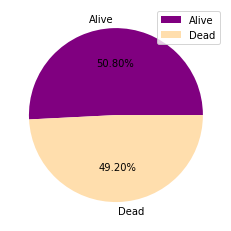

In [ ]:
# Plotting death in terms of pie chart
plt.pie(data.death.value_counts(), labels=['Alive','Dead'],autopct='%.2f%%', colors = ['purple', 'navajowhite'])
plt.legend()

In [ ]:
# Cheking, if the dataset contains Null values
fig = sns.subplots(figsize=(10,10))
m.matrix(data, color=[0.44,0.33,0.55])

AttributeError: ignored

So, here are some null values present in 'quintile' and 'ethnicgroup' column, which are to be removed.

In [ ]:
# Trying to explore Quintile
data.quintile.unique()

array([ 2.,  4.,  3.,  5.,  1.,  0., nan])

In [ ]:
# Trying to explore Quintile
data.ethnicgroup.unique()

array([nan,  1.,  3.,  9.,  2.])

Since, features 'quintile' and 'ethnicgroup' are the categorical features, therefore, the NaN values are going to be filled by mode.

In [ ]:
# filling the NaN values with mode
data.quintile = data.fillna(data.quintile.mode())
data.ethnicgroup = data.fillna(data.ethnicgroup.mode())

Now, data is free from null values. Hence, it is noise-free

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   death                 1000 non-null   int64  
 1   los                   1000 non-null   int64  
 2   age                   1000 non-null   int64  
 3   gender                1000 non-null   int64  
 4   cancer                1000 non-null   int64  
 5   cabg                  1000 non-null   int64  
 6   crt                   1000 non-null   int64  
 7   defib                 1000 non-null   int64  
 8   dementia              1000 non-null   int64  
 9   diabetes              1000 non-null   int64  
 10  hypertension          1000 non-null   int64  
 11  ihd                   1000 non-null   int64  
 12  mental_health         1000 non-null   int64  
 13  arrhythmias           1000 non-null   int64  
 14  copd                  1000 non-null   int64  
 15  obesity               

In [ ]:
# Statistical knowledge of data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
death,1000.0,0.492,0.500186,0.0,0.00,0.0,1.00,1.0
los,1000.0,10.774,12.581384,0.0,3.00,7.0,13.00,89.0
age,1000.0,78.731,11.135198,29.0,73.00,80.0,87.00,102.0
gender,1000.0,1.452,0.497940,1.0,1.00,1.0,2.00,2.0
cancer,1000.0,0.051,0.220108,0.0,0.00,0.0,0.00,1.0
cabg,1000.0,0.014,0.117549,0.0,0.00,0.0,0.00,1.0
crt,1000.0,0.003,0.054717,0.0,0.00,0.0,0.00,1.0
defib,1000.0,0.006,0.077266,0.0,0.00,0.0,0.00,1.0
dementia,1000.0,0.045,0.207408,0.0,0.00,0.0,0.00,1.0
diabetes,1000.0,0.283,0.450682,0.0,0.00,0.0,1.00,1.0


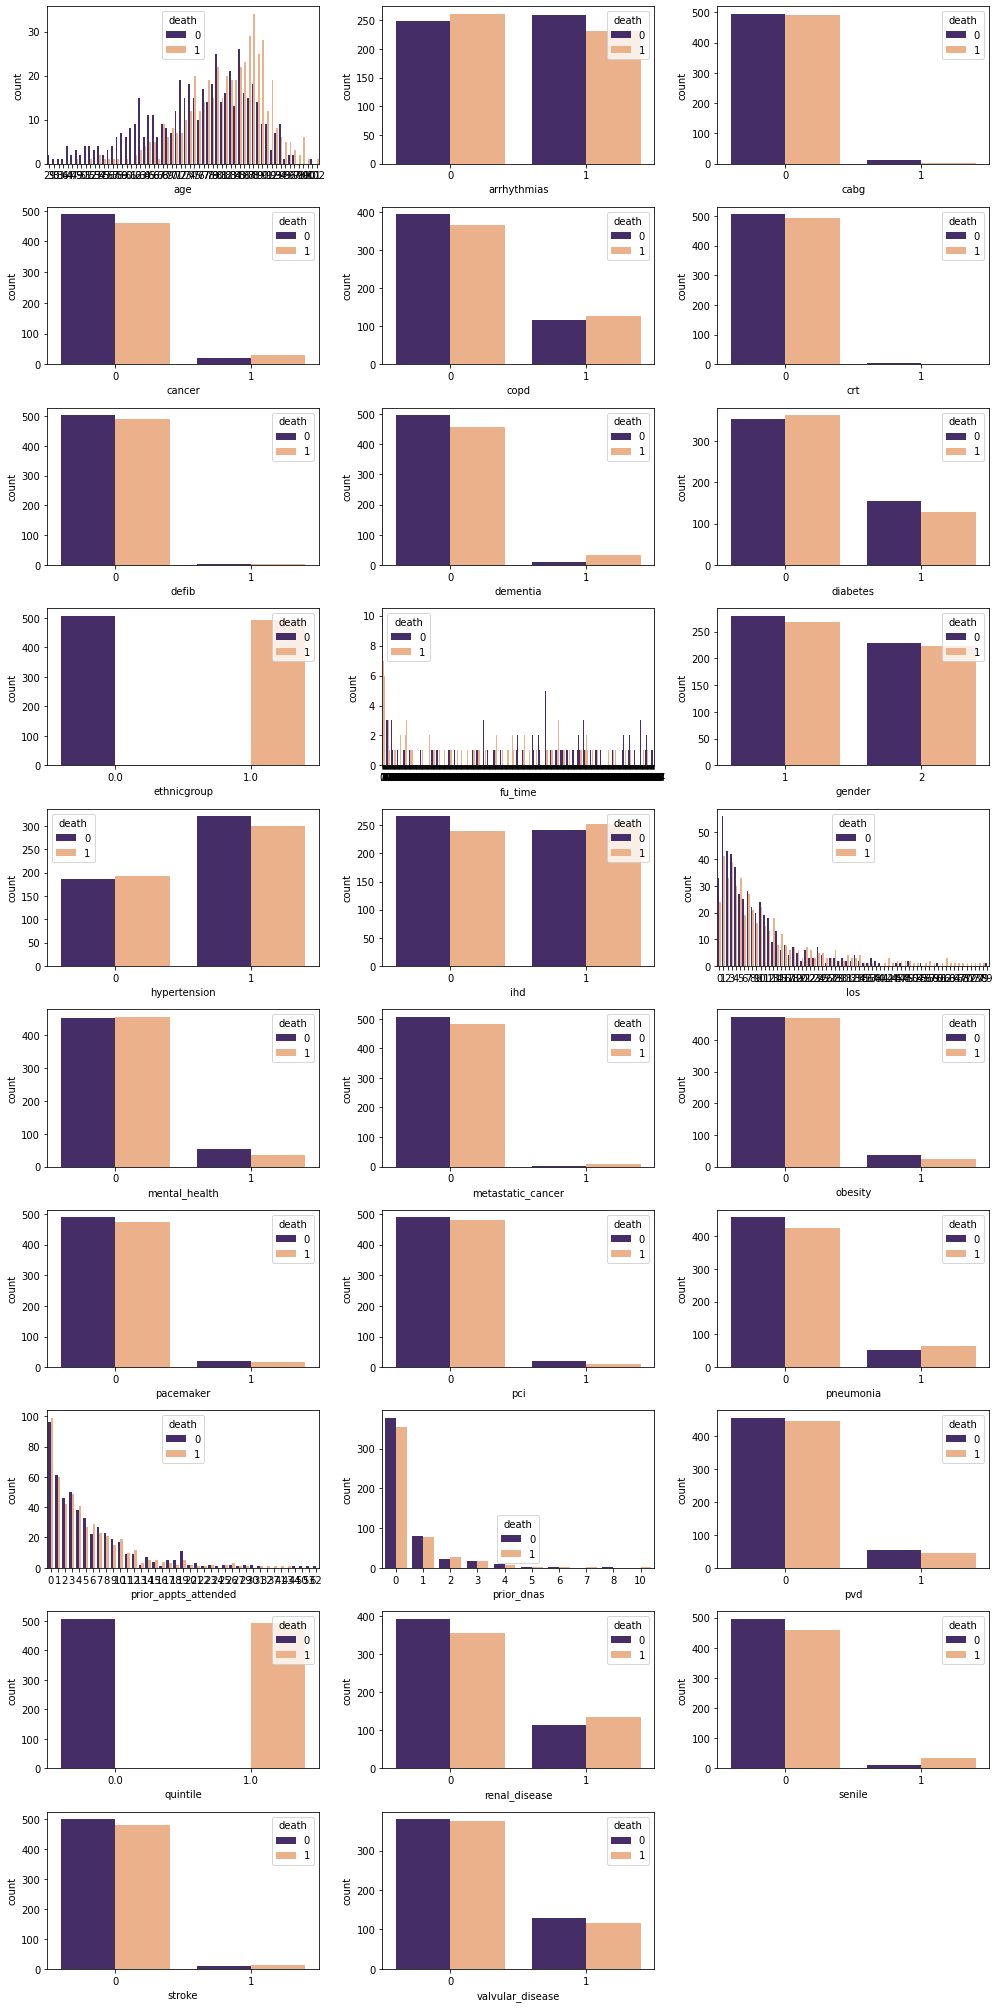

In [ ]:
# countplot of each features, determining the number of samples of each measure
plt.figure(figsize = (14,28))
for x, column in enumerate(data.columns.difference(['death'])):
    plt.subplot(10, 3, x+1)
    plt.subplots_adjust(wspace = .5, hspace = 1)
    sns.countplot(x = column, data = data, hue = 'death', palette=['#432371',"#FAAE7B"])
    plt.tight_layout()

We can observe that most of the cases of death and alive belongs to 0 class of each attribute.

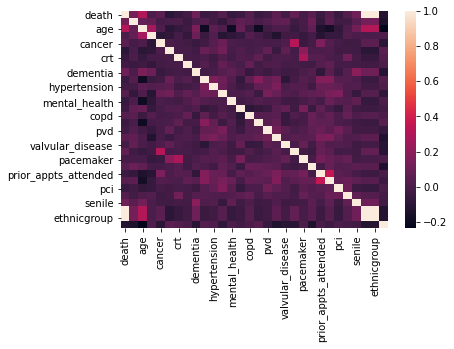

In [ ]:
# Heatmap of correlation matrix
sns.heatmap(data.corr())

The above heatmap is describing the relation between correlated features. This shows that the features have very less multicollinearity.

### Data Preparation

In [ ]:
# Seperating data into features and label
X = data.drop('death',axis=1)
y = data.death

### Feature Selection

In [ ]:
# Recursive Feature Elimination(RFE)
est = XGBClassifier()
rfe =RFE(estimator = est, n_features_to_select=18)
rfe.fit(X,y)

RFE(estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                            colsample_bylevel=1, colsample_bynode=1,
                            colsample_bytree=1, gamma=0, learning_rate=0.1,
                            max_delta_step=0, max_depth=3, min_child_weight=1,
                            missing=None, n_estimators=100, n_jobs=1,
                            nthread=None, objective='binary:logistic',
                            random_state=0, reg_alpha=0, reg_lambda=1,
                            scale_pos_weight=1, seed=None, silent=None,
                            subsample=1, verbosity=1),
    n_features_to_select=18, step=1, verbose=0)

In [ ]:
print(rfe.support_)
print(rfe.ranking_)

[False False False False False False False False False False False  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True]
[12 11 10  9  8  7  6  5  4  3  2  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1]


In [ ]:
# selected features
features = X.columns[rfe.support_]
features

Index(['mental_health', 'arrhythmias', 'copd', 'obesity', 'pvd',
       'renal_disease', 'valvular_disease', 'metastatic_cancer', 'pacemaker',
       'pneumonia', 'prior_appts_attended', 'prior_dnas', 'pci', 'stroke',
       'senile', 'quintile', 'ethnicgroup', 'fu_time'],
      dtype='object')

In [ ]:
# new X data with new feature set
X = X[features]

In [ ]:
# Splitting the data into train and test data
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

### Artificial Neural Networks

In [ ]:
# initializing Sequential model
ANN_clf = Sequential()

# Input layer
ANN_clf.add(layers.Dense(64, input_dim=18, activation='relu'))

# Hidden layer
ANN_clf.add(layers.Dense(128, activation='relu'))
ANN_clf.add(layers.Dropout(0.1))
ANN_clf.add(layers.Dense(512, activation='relu'))

# Output layer
ANN_clf.add(layers.Dense(1, activation='sigmoid'))

ANN_clf.compile(metrics=['accuracy'],loss='binary_crossentropy', optimizer=keras.optimizers.Adam(0.001))
history = ANN_clf.fit(Xtrain,ytrain,validation_data=(Xtest,ytest), epochs=20, verbose=1)

Epoch 1/20
25/25 [==============================] - 1s 13ms/step - loss: 10.5271 - accuracy: 0.5196 - val_loss: 4.6128 - val_accuracy: 0.5100
Epoch 2/20
25/25 [==============================] - 0s 5ms/step - loss: 2.4656 - accuracy: 0.5407 - val_loss: 0.9604 - val_accuracy: 0.5600
Epoch 3/20
25/25 [==============================] - 0s 5ms/step - loss: 1.0868 - accuracy: 0.5598 - val_loss: 1.0475 - val_accuracy: 0.5750
Epoch 4/20
25/25 [==============================] - 0s 5ms/step - loss: 1.2204 - accuracy: 0.5790 - val_loss: 2.0825 - val_accuracy: 0.5600
Epoch 5/20
25/25 [==============================] - 0s 5ms/step - loss: 1.3057 - accuracy: 0.5803 - val_loss: 0.5763 - val_accuracy: 0.9350
Epoch 6/20
25/25 [==============================] - 0s 5ms/step - loss: 0.8108 - accuracy: 0.6550 - val_loss: 1.3978 - val_accuracy: 0.6150
Epoch 7/20
25/25 [==============================] - 0s 5ms/step - loss: 1.2301 - accuracy: 0.6154 - val_loss: 0.8365 - val_accuracy: 0.6600
Epoch 8/20
25/25 [

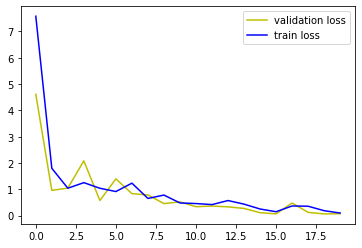

In [ ]:
# performance of ANN

plt.plot(history.history['val_loss'], color='y', label='validation loss')
plt.plot(history.history['loss'], color='b', label='train loss')
plt.legend()
plt.show()

the plot is showing that the loss while training and validation is decreasing which is a sign of a good model

### Catboost Classifier

In [ ]:
# Calling the classifier
classifier1 = CatBoostClassifier()

### Hyperparameter tuning in CatboostClassifier

In [ ]:
# Setting up a grid of parameters
param_list = {'iterations': np.linspace(10, 1000, 5),
              'depth': np.linspace(1, 8, 4),
              'learning_rate': np.linspace(0.01, 1.0, 10),
              'random_strength': np.linspace(1e-9, 10, 10),
              'bagging_temperature': np.linspace(0.0, 1.0, 5),
              'l2_leaf_reg': np.linspace(2, 30, 6),
              'scale_pos_weight':np.linspace(0.01, 1.0, 5)}

In [ ]:
# Randomized Search CV
RCV = RandomizedSearchCV(estimator = classifier1,
                         param_distributions=param_list,
                         verbose=1,
                          n_iter=20,
                         scoring='accuracy',
                         cv=5, random_state=42)

# fitting the tuner with training datasets
RCV.fit(Xtrain, ytrain)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
0:	learn: 0.1805835	total: 48.4ms	remaining: 436ms
1:	learn: 0.0819532	total: 49.1ms	remaining: 196ms
2:	learn: 0.0458039	total: 49.6ms	remaining: 116ms
3:	learn: 0.0296976	total: 50.1ms	remaining: 75.1ms
4:	learn: 0.0213130	total: 50.5ms	remaining: 50.5ms
5:	learn: 0.0163800	total: 51ms	remaining: 34ms
6:	learn: 0.0131997	total: 51.4ms	remaining: 22ms
7:	learn: 0.0110050	total: 51.9ms	remaining: 13ms
8:	learn: 0.0094105	total: 52.4ms	remaining: 5.82ms
9:	learn: 0.0082049	total: 52.8ms	remaining: 0us
0:	learn: 0.1805835	total: 335us	remaining: 3.02ms
1:	learn: 0.0819532	total: 972us	remaining: 3.89ms
2:	learn: 0.0458039	total: 1.46ms	remaining: 3.4ms
3:	learn: 0.0296976	total: 1.93ms	remaining: 2.89ms
4:	learn: 0.0213130	total: 2.4ms	remaining: 2.4ms
5:	learn: 0.0163800	total: 2.85ms	remaining: 1.9ms
6:	learn: 0.0131997	total: 3.29ms	remaining: 1.41ms
7:	learn: 0.0110050	total: 3.75ms	remaining: 937us
8:	learn: 0.0094105	tot

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0:	learn: 0.1805835	total: 391us	remaining: 3.52ms
1:	learn: 0.0819532	total: 2.14ms	remaining: 8.58ms
2:	learn: 0.0458039	total: 2.65ms	remaining: 6.17ms
3:	learn: 0.0296976	total: 2.88ms	remaining: 4.33ms
4:	learn: 0.0213130	total: 3.32ms	remaining: 3.32ms
5:	learn: 0.0163800	total: 3.74ms	remaining: 2.5ms
6:	learn: 0.0131997	total: 4.15ms	remaining: 1.78ms
7:	learn: 0.0110050	total: 4.58ms	remaining: 1.15ms
8:	learn: 0.0094105	total: 5.05ms	remaining: 560us
9:	learn: 0.0082049	total: 5.45ms	remaining: 0us
0:	learn: 0.1805867	total: 318us	remaining: 2.87ms
1:	learn: 0.0819554	total: 980us	remaining: 3.92ms
2:	learn: 0.0458057	total: 1.73ms	remaining: 4.03ms
3:	learn: 0.0296989	total: 2.29ms	remaining: 3.43ms
4:	learn: 0.0213139	total: 2.74ms	remaining: 2.74ms
5:	learn: 0.0163806	total: 3.19ms	remaining: 2.13ms
6:	learn: 0.0132002	total: 3.63ms	remaining: 1.56ms
7:	learn: 0.0110054	total: 4.09ms	remaining: 1.02ms
8:	learn: 0.0094107	total: 4.53ms	remaining: 503us
9:	learn: 0.0082051	t

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
_catboost.CatBoostError: catboost/private/libs/options/json_helper.h:171: Can't parse parameter "iterations" with value: 752.5

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
_catboost.CatBoostError: catboost/private/libs/options/json_helper.h:171: Can't parse parameter "iterations" with value: 257.5

  FitFailedWarning)


17:	learn: 0.0037741	total: 67.2ms	remaining: 3.67s
18:	learn: 0.0036306	total: 71.2ms	remaining: 3.68s
19:	learn: 0.0035003	total: 75ms	remaining: 3.67s
20:	learn: 0.0033813	total: 79.1ms	remaining: 3.69s
21:	learn: 0.0032722	total: 84.9ms	remaining: 3.77s
22:	learn: 0.0031716	total: 89.3ms	remaining: 3.79s
23:	learn: 0.0030865	total: 93ms	remaining: 3.78s
24:	learn: 0.0030072	total: 96.9ms	remaining: 3.78s
25:	learn: 0.0029428	total: 101ms	remaining: 3.78s
26:	learn: 0.0028721	total: 105ms	remaining: 3.77s
27:	learn: 0.0028056	total: 109ms	remaining: 3.77s
28:	learn: 0.0027506	total: 113ms	remaining: 3.77s
29:	learn: 0.0026982	total: 117ms	remaining: 3.77s
30:	learn: 0.0026407	total: 121ms	remaining: 3.77s
31:	learn: 0.0025863	total: 125ms	remaining: 3.77s
32:	learn: 0.0025407	total: 134ms	remaining: 3.92s
33:	learn: 0.0024986	total: 138ms	remaining: 3.92s
34:	learn: 0.0024581	total: 142ms	remaining: 3.92s
35:	learn: 0.0024191	total: 147ms	remaining: 3.92s
36:	learn: 0.0023815	total:

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
_catboost.CatBoostError: catboost/private/libs/options/json_helper.h:171: Can't parse parameter "depth" with value: 3.333333333

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
_catboost.CatBoostError: catboost/private/libs/options/json_helper.h:171: Can't parse parameter "depth" with value: 5.666666667

  FitFailedWarning)


Streaming output truncated to the last 5000 lines.
10:	learn: 0.0008439	total: 7.39ms	remaining: 665ms
11:	learn: 0.0008438	total: 7.98ms	remaining: 657ms
12:	learn: 0.0008438	total: 8.55ms	remaining: 649ms
13:	learn: 0.0008437	total: 9.12ms	remaining: 643ms
14:	learn: 0.0008437	total: 9.7ms	remaining: 637ms
15:	learn: 0.0008436	total: 10.3ms	remaining: 632ms
16:	learn: 0.0008436	total: 10.8ms	remaining: 627ms
17:	learn: 0.0008435	total: 11.4ms	remaining: 623ms
18:	learn: 0.0008435	total: 12ms	remaining: 620ms
19:	learn: 0.0008434	total: 12.6ms	remaining: 616ms
20:	learn: 0.0008434	total: 13.1ms	remaining: 613ms
21:	learn: 0.0008433	total: 13.8ms	remaining: 612ms
22:	learn: 0.0008433	total: 14.3ms	remaining: 609ms
23:	learn: 0.0008432	total: 14.9ms	remaining: 606ms
24:	learn: 0.0008432	total: 15.5ms	remaining: 604ms
25:	learn: 0.0008431	total: 16.1ms	remaining: 604ms
26:	learn: 0.0008431	total: 16.7ms	remaining: 601ms
27:	learn: 0.0008430	total: 17.2ms	remaining: 598ms
28:	learn: 0.000

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   32.5s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=<catboost.core.CatBoostClassifier object at 0x7f65f6608110>,
                   iid='deprecated', n_iter=20, n_jobs=None,
                   param_distributions={'bagging_temperature': array([0.  , 0.25, 0.5 , 0.75, 1.  ]),
                                        'depth': array([1.        , 3.33333333, 5.66666667, 8.        ]),
                                        'iterations': array([  10. ,  257.5,  505. ,  752.5, 1000. ]),
                                        'l2_leaf_reg': array([ 2. ,  7.6, 13.2, 18.8,...
                                        'learning_rate': array([0.01, 0.12, 0.23, 0.34, 0.45, 0.56, 0.67, 0.78, 0.89, 1.  ]),
                                        'random_strength': array([1.00000000e-09, 1.11111111e+00, 2.22222222e+00, 3.33333333e+00,
       4.44444445e+00, 5.55555556e+00, 6.66666667e+00, 7.77777778e+00,
       8.88888889e+00, 1.00000000e+01]),
                                       

#### Checking RandomSearchCV results and parameters it provides

In [ ]:
# best score it get
print('Best score of tuner: ', RCV.best_score_)

# set of best parameters
print('Best parameters set: ')
RCV.best_params_

Best score of tuner:  1.0
Best parameters set: 


{'bagging_temperature': 0.5,
 'depth': 1.0,
 'iterations': 10.0,
 'l2_leaf_reg': 18.799999999999997,
 'learning_rate': 1.0,
 'random_strength': 1.1111111120000001,
 'scale_pos_weight': 0.7525}

Firstly, the tuner is fitted with Catboost classifier and the corresponding best parameters for that classifier is given by the Randomized Search CV tuner.

In [ ]:
# fitting the catboost classifier with best parameters, we got
catboost_clf = RCV.best_estimator_
catboost_clf.fit(Xtrain, ytrain)

# prediction
catboost_clf_pred = catboost_clf.predict(Xtest)

0:	learn: 0.1703044	total: 412us	remaining: 3.71ms
1:	learn: 0.0745623	total: 2.07ms	remaining: 8.27ms
2:	learn: 0.0403015	total: 2.75ms	remaining: 6.42ms
3:	learn: 0.0254913	total: 3.47ms	remaining: 5.2ms
4:	learn: 0.0179929	total: 4.04ms	remaining: 4.04ms
5:	learn: 0.0136751	total: 4.58ms	remaining: 3.05ms
6:	learn: 0.0109352	total: 7.11ms	remaining: 3.04ms
7:	learn: 0.0090664	total: 8.14ms	remaining: 2.04ms
8:	learn: 0.0077206	total: 9.4ms	remaining: 1.04ms
9:	learn: 0.0067100	total: 9.96ms	remaining: 0us


Here, the classifier is trained and gave predictions

#### Performance of Catboost

In [ ]:
# perfromance of catboost classifier over test set

print('                  classification report                ')

print(classification_report(ytest, catboost_clf_pred))
print('accuracy score: ', accuracy_score(ytest, catboost_clf_pred))
print('r2 score: ', r2_score(ytest, catboost_clf_pred))
print('log loss: ', log_loss(ytest, catboost_clf_pred))

                  classification report                
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       102
           1       1.00      1.00      1.00        98

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200

accuracy score:  1.0
r2 score:  1.0
log loss:  9.992007221626413e-16


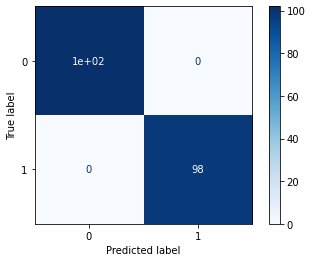

In [ ]:
# Confusion matrix
plot_confusion_matrix(estimator=catboost_clf, X=Xtest, y_true=ytest, cmap='Blues')

### AdaBoost classifier

In [ ]:
# calling the classifier
from sklearn.tree import DecisionTreeClassifier
classifier2 = AdaBoostClassifier(base_estimator=DecisionTreeClassifier())

In [ ]:
# setting up a grid of parameters
import random
param_list = {'n_estimators':[10, 50, 100, 200, 500, 1000, 1500, 2000],
              'learning_rate':(0.001, 0.01,0.1, 1),
              'base_estimator__max_depth':(2,4, 6, 8, 10, 3, 5, 7, 9),
              'base_estimator__min_samples_leaf':(5,10, 15, 20)
              }

In [ ]:
# Randomized Search CV
RCV = RandomizedSearchCV(estimator = classifier2,
                         param_distributions=param_list,
                         verbose=1,
                          n_iter=20,
                         scoring='accuracy',
                         cv=5, random_state=42)

# fitting the tuner with training datasets
RCV.fit(Xtrain, ytrain)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.6s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                                base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                                                      class_weight=None,
                                                                                      criterion='gini',
                                                                                      max_depth=None,
                                                                                      max_features=None,
                                                                                      max_leaf_nodes=None,
                                                                                      min_impurity_decrease=0.0,
                                                                                      min_impurity_split=None,
                                         

#### Checking RandomSearchCV results and parameters it provides

In [ ]:
# best score it get
print('Best score of tuner: ', RCV.best_score_)

# set of best parameters
print('Best parameters set: ')
RCV.best_params_

Best score of tuner:  1.0
Best parameters set: 


{'base_estimator__max_depth': 4,
 'base_estimator__min_samples_leaf': 10,
 'learning_rate': 0.01,
 'n_estimators': 1500}

After that, the fresh tuner is fitted with AdaBoost classifier and the corresponding best parameters for that classifier is given by the Randomized Search CV tuner.

In [ ]:
# best estimator
RCV.best_estimator_

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=4,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=10,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                         

In [ ]:
# fitting the adaboost classifier with best parameters, we got
adaboost_clf = RCV.best_estimator_
adaboost_clf.fit(Xtrain, ytrain)

# prediction
adaboost_clf_pred = adaboost_clf.predict(Xtest)

Here, the classifier is trained and gave predictions

#### Performance of Adaboost

In [ ]:
# perfromance of Adaboost classifier over test set
print('                  classification report                ')
print(classification_report(ytest, adaboost_clf_pred))

print('accuracy score: ', accuracy_score(ytest, adaboost_clf_pred))
print('r2 score: ', r2_score(ytest, adaboost_clf_pred))
print('log loss: ', log_loss(ytest, adaboost_clf_pred))

                  classification report                
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       102
           1       1.00      1.00      1.00        98

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200

accuracy score:  1.0
r2 score:  1.0
log loss:  9.992007221626413e-16


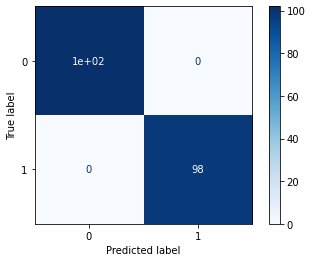

In [ ]:
# Confusion matrix
plot_confusion_matrix(estimator=adaboost_clf, X=Xtest, y_true=ytest, cmap='Blues')

### Support vector classifier

In [ ]:
# calling the classifier
classifier3 = SVC()

In [ ]:
# setting up a grid of parameters
import random
param_list = {'kernel': ['rbf', 'linear'], 'C': [6,7,8,9,10,11,12] }

In [ ]:
# Randomized Search CV
RCV = RandomizedSearchCV(estimator = classifier3,
                         param_distributions=param_list,
                         verbose=1,
                          n_iter=20,
                         scoring='accuracy',
                         n_jobs=-1,
                         cv=5, random_state=42)

# fitting the tuner with training datasets
RCV.fit(Xtrain, ytrain)

Fitting 5 folds for each of 14 candidates, totalling 70 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 14 is smaller than n_iter=20. Running 14 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:    3.0s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                                 class_weight=None, coef0=0.0,
                                 decision_function_shape='ovr', degree=3,
                                 gamma='scale', kernel='rbf', max_iter=-1,
                                 probability=False, random_state=None,
                                 shrinking=True, tol=0.001, verbose=False),
                   iid='deprecated', n_iter=20, n_jobs=-1,
                   param_distributions={'C': [6, 7, 8, 9, 10, 11, 12],
                                        'kernel': ['rbf', 'linear']},
                   pre_dispatch='2*n_jobs', random_state=42, refit=True,
                   return_train_score=False, scoring='accuracy', verbose=1)

#### Checking RandomSearchCV results and parameters it provides

In [ ]:
# best score it get
print('Best score of tuner: ', RCV.best_score_)

# set of best parameters
print('Best parameters set: ')
RCV.best_params_

Best score of tuner:  1.0
Best parameters set: 


{'C': 6, 'kernel': 'linear'}

At last, the tuner is fitted with Support Vectors classifier and the corresponding best parameters for that classifier is given by the Randomized Search CV tuner.

In [ ]:
# fitting the support vectors classifier with best parameters, we got
supportvector_clf = RCV.best_estimator_
supportvector_clf.fit(Xtrain, ytrain)

# prediction
supportvector_clf_pred = supportvector_clf.predict(Xtest)

#### Performance of Support Vector

In [ ]:
# perfromance of Support vector classifier over test set
print('                  classification report                ')
print(classification_report(ytest, adaboost_clf_pred))

print('accuracy score: ', accuracy_score(ytest, supportvector_clf_pred))
print('r2 score: ', r2_score(ytest, supportvector_clf_pred))
print('log loss: ', log_loss(ytest, supportvector_clf.predict(Xtest)))

                  classification report                
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       102
           1       1.00      1.00      1.00        98

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200

accuracy score:  1.0
r2 score:  1.0
log loss:  9.992007221626413e-16


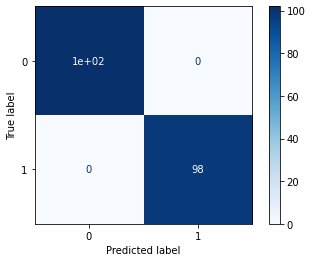

In [ ]:
# Confusion matrix
plot_confusion_matrix(estimator=supportvector_clf, X=Xtest, y_true=ytest, cmap='Blues')

Hence, after looking at different types of algorithm and neural network we can conclude here that model is performing outstandingly. The cause can be the use of hyperparameter technique. And all the models are giving 100% accuracy while minimising the value of losses.